Enter Ticker Symbol NIFTYBEES.NS


/tmp/ipython-input-3784312013.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, period="1y", interval="1d")
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


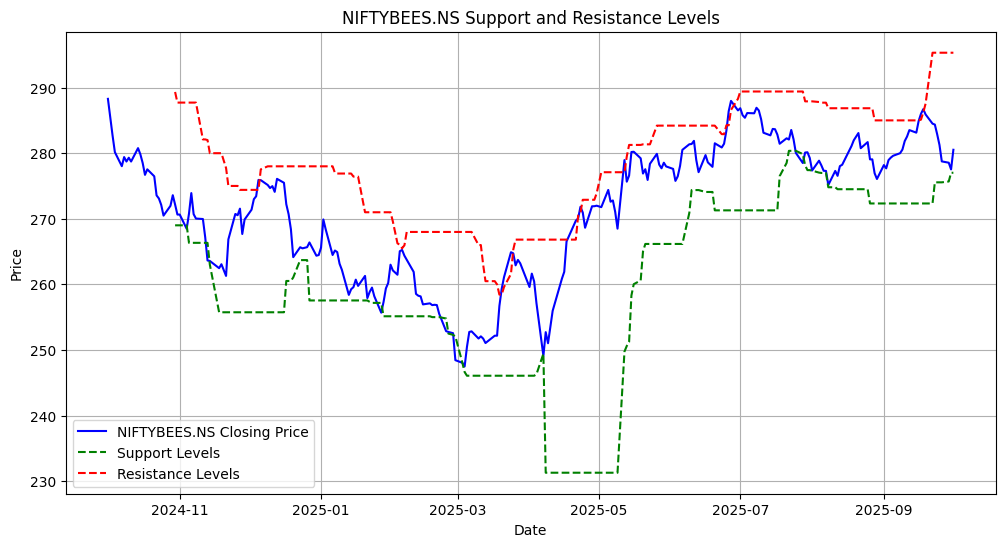

/tmp/ipython-input-3784312013.py:68: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  latest_support = float(support_levels.dropna().iloc[-1])
/tmp/ipython-input-3784312013.py:69: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  latest_resistance = float(resistance_levels.dropna().iloc[-1])
/tmp/ipython-input-3784312013.py:70: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  latest_close = float(aligned_close.iloc[-1])
/tmp/ipython-input-3784312013.py:100: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  latest_rsi = float(rsi_series.dropna().iloc[-1])
/tmp/ipython-input-3784312013.py:138: FutureWarning: YF.d


--- Support & Resistance Summary ---
Latest Close Price     : 280.51
Latest Support Level   : 277.01
Latest Resistance Level: 295.30
Interpretation         : 🟢 Near Support (Potential Buying Opportunity)
📢 Breakout Status      : ✅ Price is within Support & Resistance range (No breakout detected)

--- RSI (14-day) Summary ---
Latest RSI Value       : 44.10
RSI Interpretation     : ⚪ RSI between 30-70 (Neutral momentum)

---SMA Analysis 50 Day SMA vs 200 Day SMA---

Stock: NIFTYBEES.NS
Latest 50-day SMA: 280.34
Latest 200-day SMA: 271.23
✅ 50-day SMA is HIGHER than 200-day SMA (Possible Uptrend - Golden Cross)


In [ ]:

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Function to calculate support and resistance
def calculate_support_resistance(stock_symbol, lookback_period=20):
    # Download historical data for the stock
    data = yf.download(stock_symbol, period="1y", interval="1d")

    # Create lists to store support and resistance levels
    support_levels = []
    resistance_levels = []

    # Loop through the historical data
    for i in range(lookback_period, len(data)):
        # Get the current window of data
        window = data.iloc[i - lookback_period:i]

        # Find local minima (support) and local maxima (resistance) within the window
        local_min = window['Low'].min()
        local_max = window['High'].max()

        support_levels.append(local_min)
        resistance_levels.append(local_max)

    # Convert the levels into pandas Series for easy manipulation
    support_levels = pd.Series(support_levels, index=data.index[lookback_period:])
    resistance_levels = pd.Series(resistance_levels, index=data.index[lookback_period:])

    return data, support_levels, resistance_levels

# Function to plot the stock data along with support and resistance
def plot_support_resistance(data, stock_symbol, support_levels, resistance_levels):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label=f'{stock_symbol} Closing Price', color='blue')
    plt.plot(support_levels, label='Support Levels', color='green', linestyle='--')
    plt.plot(resistance_levels, label='Resistance Levels', color='red', linestyle='--')

    plt.title(f'{stock_symbol} Support and Resistance Levels')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Function to calculate RSI (14-day)
def calculate_rsi(data, period=14):

    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to print latest levels, interpretation and RSI
def print_support_resistance_summary(data, support_levels, resistance_levels, rsi_series):
    # Align Close price with support/resistance date range
    aligned_close = data['Close'].reindex(support_levels.index).dropna()

    # Ensure we have clean last values
    latest_support = float(support_levels.dropna().iloc[-1])
    latest_resistance = float(resistance_levels.dropna().iloc[-1])
    latest_close = float(aligned_close.iloc[-1])

    print(f"\n--- Support & Resistance Summary ---")
    print(f"Latest Close Price     : {latest_close:.2f}")
    print(f"Latest Support Level   : {latest_support:.2f}")
    print(f"Latest Resistance Level: {latest_resistance:.2f}")

    # Small buffer for proximity detection (2% of price)
    buffer = 0.02 * latest_close

    if abs(latest_close - latest_support) < buffer:
         interpretation = "🟢 Near Support (Potential Buying Opportunity)"
    elif abs(latest_close - latest_resistance) < buffer:
        interpretation = "🔴 Near Resistance (Potential Selling Pressure)"
    else:
        interpretation = "⚪ Price is between Support & Resistance (No immediate signal)"

    print(f"Interpretation         : {interpretation}")

    # Breakout/Breakdown Detection ()
    if latest_close > latest_resistance:
        breakout_status = "🚀 ALERT: Price broke ABOVE Resistance (Possible Bullish Breakout)"
    elif latest_close < latest_support:
        breakout_status = "⚠️ ALERT: Price broke BELOW Support (Possible Bearish Breakdown)"
    else:
        breakout_status = "✅ Price is within Support & Resistance range (No breakout detected)"

    print(f"📢 Breakout Status      : {breakout_status}")

    # --- RSI Section ---
    latest_rsi = float(rsi_series.dropna().iloc[-1])
    print(f"\n--- RSI (14-day) Summary ---")
    print(f"Latest RSI Value       : {latest_rsi:.2f}")

    if latest_rsi > 70:
        rsi_interpretation = "🔴 RSI > 70 (Overbought — Possible correction)"
    elif latest_rsi < 30:
        rsi_interpretation = "🟢 RSI < 30 (Oversold — Possible rebound)"
    else:
        rsi_interpretation = "⚪ RSI between 30-70 (Neutral momentum)"

    print(f"RSI Interpretation     : {rsi_interpretation}")

# --- Example usage ---
stock_symbol = input('Enter Ticker Symbol ').strip()
# 0P0000YWL1.BO -> Parag Parikh Flexi Cap Fund Direct Growth
# "NIFTYBEES.NS"
# GOLDBEES.NS
data, support_levels, resistance_levels = calculate_support_resistance(stock_symbol)

# Calculate RSI
rsi_series = calculate_rsi(data)

# Introduce a delay to avoid hitting the rate limit
time.sleep(5)

# Plot the stock data with the calculated support and resistance levels
plot_support_resistance(data, stock_symbol, support_levels, resistance_levels)

# Print the latest levels, interpretation and RSI
print_support_resistance_summary(data, support_levels, resistance_levels, rsi_series)




# Function to check SMA crossover
def check_sma_crossover(stock_symbol):
    # Fetch last 250 trading days of data (approx 1 year)
    data = yf.download(stock_symbol, period="1y", interval="1d")

    # Calculate 50-day SMA and 200-day SMA
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['SMA_200'] = data['Close'].rolling(window=200).mean()

    # Get latest SMA values
    latest_50_sma = data['SMA_50'].iloc[-1]
    latest_200_sma = data['SMA_200'].iloc[-1]


    print("\n---SMA Analysis 50 Day SMA vs 200 Day SMA---")
    print(f"\nStock: {stock_symbol}")
    print(f"Latest 50-day SMA: {latest_50_sma:.2f}")
    print(f"Latest 200-day SMA: {latest_200_sma:.2f}")

    # Check crossover condition
    if latest_50_sma > latest_200_sma:
        print("✅ 50-day SMA is HIGHER than 200-day SMA (Possible Uptrend - Golden Cross)")
    elif latest_50_sma < latest_200_sma:
        print("❌ 50-day SMA is LOWER than 200-day SMA (Possible Downtrend - Death Cross)")
    else:
        print("⚠️ 50-day SMA is EQUAL to 200-day SMA (Neutral)")


# Example usage
stock = stock_symbol
check_sma_crossover(stock)


In [ ]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from tqdm.notebook import tqdm
import time

# Download historical stock data
def fetch_stock_data(stock_symbol, period="1y", interval="1d"):
    print(f"⏳ Fetching data for {stock_symbol}...")
    data = yf.download(stock_symbol, period=period, interval=interval, progress=False)
    print(f"✅ Data fetched: {data.shape[0]} rows")
    return data

# Support & Resistance Calculation
def calculate_support_resistance(data, lookback_period=20):
    support = []
    resistance = []

    for i in tqdm(range(lookback_period, len(data)), desc="Calculating S/R"):
        window = data.iloc[i - lookback_period:i]
        support.append(window['Low'].min())
        resistance.append(window['High'].max())

    return pd.Series(support, index=data.index[lookback_period:]), pd.Series(resistance, index=data.index[lookback_period:])

# RSI Calculation
def calculate_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# MACD Calculation
def calculate_macd(data, short=12, long=26, signal=9):
    ema_short = data['Close'].ewm(span=short, adjust=False).mean()
    ema_long = data['Close'].ewm(span=long, adjust=False).mean()
    macd = ema_short - ema_long
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line

# Plot advanced candlestick chart with overlays
def plot_chart(data, stock_symbol, support, resistance, rsi, macd, signal_line):
    ohlc_cols = ['Open', 'High', 'Low', 'Close']

    if all(col in data.columns for col in ohlc_cols):
        data_clean = data.dropna(subset=ohlc_cols)
        mpf.plot(data_clean, type='candle', style='yahoo', title=f"{stock_symbol} - Candlestick Chart", volume=True)
    else:
        print("⚠️ Candlestick chart skipped — OHLC data not available for this symbol.")

    # RSI & MACD Plots
    fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    ax[0].plot(rsi, color='purple')
    ax[0].axhline(70, color='red', linestyle='--')
    ax[0].axhline(30, color='green', linestyle='--')
    ax[0].set_title("RSI (14)")

    ax[1].plot(macd, label='MACD', color='blue')
    ax[1].plot(signal_line, label='Signal Line', color='orange')
    ax[1].legend()
    ax[1].set_title("MACD")

    plt.tight_layout()
    plt.show()



# Summary Report
def print_summary(data, support, resistance, rsi, macd, signal_line):
    latest_close = data['Close'].dropna().iloc[-1].item()
    latest_support = support.dropna().iloc[-1].item()
    latest_resistance = resistance.dropna().iloc[-1].item()
    latest_rsi = rsi.dropna().iloc[-1].item()
    latest_macd = macd.dropna().iloc[-1].item()
    latest_signal = signal_line.dropna().iloc[-1].item()

    print("\n📊 --- Summary Report ---")
    print(f"Latest Close Price   : ₹{latest_close:.2f}")
    print(f"Support Level        : ₹{latest_support:.2f}")
    print(f"Resistance Level     : ₹{latest_resistance:.2f}")

    # RSI Interpretation
    if latest_rsi > 70:
        print(f"RSI                  : {latest_rsi:.2f} 🔴 Overbought")
    elif latest_rsi < 30:
        print(f"RSI                  : {latest_rsi:.2f} 🟢 Oversold")
    else:
        print(f"RSI                  : {latest_rsi:.2f} ⚪ Neutral")

    # MACD Signal
    if latest_macd > latest_signal:
        print("MACD                 : ✅ Bullish Crossover (Momentum Up)")
    else:
        print("MACD                 : ❌ Bearish Crossover (Momentum Down)")


# 🚀 EXECUTION
symbol = input("Enter stock symbol: ").strip()
data = fetch_stock_data(symbol)
support, resistance = calculate_support_resistance(data)
rsi = calculate_rsi(data)
macd, signal_line = calculate_macd(data)

# plot_chart(data, symbol, support, resistance, rsi, macd, signal_line)
print_summary(data, support, resistance, rsi, macd, signal_line)


Enter stock symbol: NIFTYBEES.NS
⏳ Fetching data for NIFTYBEES.NS...
✅ Data fetched: 251 rows


/tmp/ipython-input-1037153883.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, period=period, interval=interval, progress=False)


Calculating S/R:   0%|          | 0/231 [00:00<?, ?it/s]


📊 --- Summary Report ---
Latest Close Price   : ₹280.51
Support Level        : ₹277.01
Resistance Level     : ₹295.30
RSI                  : 44.10 ⚪ Neutral
MACD                 : ❌ Bearish Crossover (Momentum Down)
